In [1]:
import numpy as np
from tqdm.auto import tqdm

import torch
import pytorch_lightning as pl

from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import RichProgressBar
from pytorch_lightning.callbacks.progress.rich_progress import RichProgressBarTheme

from torch import nn
from torch import optim
from torch.utils.data import DataLoader, Subset

from deeptime.data.datamodules import UcrDataModule
from deeptime.models.representation import LinearAutoEncoder

C:\Users\medei\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
progress_bar = RichProgressBar(
    theme=RichProgressBarTheme(
        description="green_yellow",
        progress_bar="green1",
        progress_bar_finished="green1",
        progress_bar_pulse="#6206E0",
        batch_progress="green_yellow",
        time="grey82",
        processing_speed="grey82",
        metrics="grey82",
    )
)

In [3]:
DATASETS = [
    'Yoga',
    'WormsTwoClass',
    'Wine',
    'Wafer',
    'TwoLeadECG',
    'Strawberry',
    'SemgHandGenderCh2', 
    'BeetleFly',
    'BirdChicken',
    'Computers',
    'DistalPhalanxOutlineCorrect',
    'Earthquakes',
    'ECG200',
    'ECGFiveDays',
    'FordA',
    'FordB',
    'HandOutlines',
    'ItalyPowerDemand', 
    'MiddlePhalanxOutlineCorrect',
    'Chinatown',
    'FreezerRegularTrain',
    'FreezerSmallTrain',
    'GunPointAgeSpan',
    'GunPointMaleVersusFemale',
    'GunPointOldVersusYoung',
    'PowerCons',
    'Coffee',
    'Ham',
    'Herring',
    'Lightning2',
    'MoteStrain',
    'PhalangesOutlinesCorrect',
    'ProximalPhalanxOutlineCorrect',
    'ShapeletSim',
    'SonyAIBORobotSurface1',
    'SonyAIBORobotSurface2',
    'ToeSegmentation1',
    'ToeSegmentation2',
    'HouseTwenty'
]

In [4]:
print(f'Starting the experiments with {len(DATASETS)} datasets from UCR...')

for dataset in DATASETS:
    data_dir = 'C:\\Users\\medei\\Desktop\\Gilberto\\Projetos\\deeptime\\docs\\datasets'
    data_module = UcrDataModule(dataset_name=dataset, data_dir=data_dir)
    linear_autoencoder = LinearAutoEncoder(input_dim=data_module.sequence_length, latent_dim=32)

    trainer = pl.Trainer(
        max_epochs=10,
        accelerator='gpu',
        devices=-1,
        callbacks=[EarlyStopping(monitor='val_loss', mode='min', patience=10, min_delta=0.01)]
    )

    trainer.fit(model=linear_autoencoder, datamodule=data_module)
    break

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Starting the experiments with 39 datasets from UCR...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type       | Params
------------------------------------
0 | e    | Sequential | 479 K 
1 | d    | Sequential | 479 K 
------------------------------------
958 K     Trainable params
0         Non-trainable params
958 K     Total params
3.832     Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|                                                              | 0/2 [00:00<?, ?it/s]

C:\Users\medei\AppData\Local\Programs\Python\Python39\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


C:\Users\medei\AppData\Local\Programs\Python\Python39\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\medei\AppData\Local\Programs\Python\Python39\lib\site-packages\pytorch_lightning\trainer\trainer.py:1595: PossibleUserWarning: The number of training batches (8) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 0:  80%|████████████████████████████▊       | 8/10 [00:00<00:00, 90.92it/s, loss=0.8, v_num=19, train_loss=0.564]
Validation: 0it [00:00, ?it/s]
Epoch 1:  80%|██████████████▍   | 8/10 [00:00<00:00, 74.07it/s, loss=0.596, v_num=19, train_loss=0.295, val_loss=0.511]
Validation: 0it [00:00, ?it/s]
Epoch 2:  80%|██████████████▍   | 8/10 [00:00<00:00, 99.99it/s, loss=0.395, v_num=19, train_loss=0.226, val_loss=0.275]
Validation: 0it [00:00, ?it/s]
Epoch 3:  80%|██████████████▍   | 8/10 [00:00<00:00, 90.92it/s, loss=0.263, v_num=19, train_loss=0.233, val_loss=0.219]
Validation: 0it [00:00, ?it/s]
Epoch 4:  80%|██████████████▍   | 8/10 [00:00<00:00, 76.20it/s, loss=0.223, v_num=19, train_loss=0.185, val_loss=0.199]
Validation: 0it [00:00, ?it/s]
Epoch 5:  80%|██████████████▍   | 8/10 [00:00<00:00, 77.82it/s, loss=0.197, v_num=19, train_loss=0.145, val_loss=0.177]
Validation: 0it [00:00, ?it/s]
Epoch 6:  80%|███████████████▏   | 8/10 [00:00<00:00, 85.11it/s, loss=0.17, v_num=19, train_lo

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████| 10/10 [00:00<00:00, 64.52it/s, loss=0.128, v_num=19, train_loss=0.0917, val_loss=0.0976]


In [22]:
import matplotlib.pyplot as plt

linear_autoencoder = LinearAutoEncoder(input_dim=426, latent_dim=32)
linear_autoencoder.load_state_dict(torch.load('../../../pretrain/representation/Yoga/linear_autoencoder.pt'))

<All keys matched successfully>

In [23]:
data_module = UcrDataModule(dataset_name='Yoga', data_dir='./')

data_module.prepare_data()
data_module.setup(stage='fit')

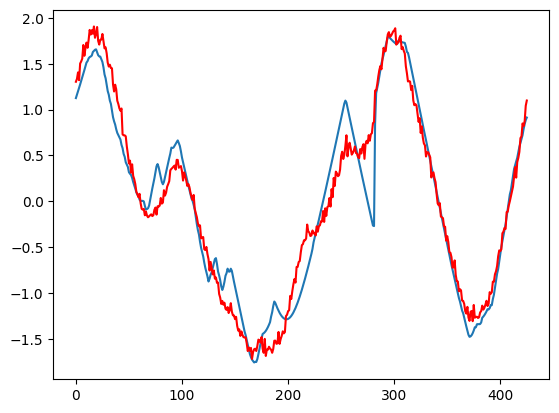

In [24]:
sample = data_module.train_dataset[:1][0]
sample_list = sample.reshape((1, 426)).tolist()

sample_pred = linear_autoencoder(sample)

plt.plot(list(range(426)), sample_list[0])
plt.plot(list(range(426)), sample_pred[0].reshape((1, 426)).tolist()[0], color='red')